#**Подготовка датасета и выделение признаков**

#Название проекта:
**Разработка системы распознавания русскоязычного текста, сгенерированного LLM**

Область для которой будет реализован проект искусственного интеллекта и машинного обучения – образование.

**Актуальность** данной задачи обусловлена тем, что существующие в настоящее время популярные сервисы антиплагиата очень плохо  распознают сгенерированный русскоязычный текст.

**Цели проекта**
1.	Выявление отличий  в статистических  характеристиках русскоязычного текста написанного человеком,  и текста сгенерированного большими языковыми моделями.

2.	Создание системы распознавания русскоязычного текста сгенерированного большими языковыми моделями.

#Данные

50 дипломных работ студентов специальности 09.02.07 "Информационные системы" объемом 40 – 50стр. выполненных в 2019 -2020гг, и 50 дипломных работ студентов той же специальности объемом 40 – 50стр,  выполненных в 2024гг.

Каждая студенческая работа была переведена в формат txt, очищена от фрагментов программного кода.

Так же из работ был удален экономический раздел, как не представляющий интереса для данного исследования (он почти полностью состоит из формул)

Таким образом получилось 100 txt-файлов, первые 50 из которых - работы 2019 - 2020 гг. (1.txt - 50.txt)

Последние 50 txt-файлов (51.txt - 100.txt)- работы 2024 г

**Студенческие работы за 2024 г. были написаны с использованием различных языковых нейросетей (gpt-3.5, gpt-4, gigachat, claude 3 opus)**

Изначально студенты писали свои работы самостоятельно, с использованием учебной литературы.

Но, затем каждый абзац текста этих дипломных работ был обработан ккой-либо текстовой нейросетью для улучшения стиля написания.

**Промт** - "Перепиши этот текст в академическом стиле, в строгой логической последовательности

#Начинаем обработку

**Делим текст на абзацы по 5 предложений, записываем всё в csv-файл.**

**Столбцы - Номер документа, номер абзаца в документе, содержимое абзаца.**

**Обрабатываем 100 txt-файлов. **

**Первые 50 (1 - 50) - работы 2019 - 2020 гг.**

**Последние 50 (51 - 100) - работы 2024 гг.**

In [ ]:
import os
import re
import csv

Функции для обработки текста

In [ ]:
def clean_sentence(sentence):
    # Удаляем начальные пробелы и цифры
    sentence = re.sub(r'^\s*\d*\s*', '', sentence.strip())
    # Удаляем все символы в начале предложения, кроме букв
    sentence = re.sub(r'^[^а-яА-Я]+', '', sentence)
    # Удаляем символы "-" и "*"
    sentence = re.sub(r'[-*]', '', sentence)
    # Удаляем числа в квадратных скобках
    sentence = re.sub(r'\[\d+\]', '', sentence)
    # Делаем первую букву заглавной
    return sentence.capitalize()

In [ ]:
def process_file(file_path, file_number):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()

    # Разбиваем текст на предложения
    sentences = re.split(r'(?<=[.!?])\s+', content)
    sentences = [clean_sentence(s) for s in sentences if s.strip()]

    paragraphs = []
    for i in range(0, len(sentences), 5):
        paragraph = ' '.join(sentences[i:i+5])
        if paragraph.strip():  # Проверяем, что абзац не пустой
            paragraphs.append({
                'file_number': file_number,
                'paragraph_number': len(paragraphs) + 1,
                'content': paragraph
            })

    return paragraphs

Обрабатываем 100 txt-файлов и создаем результирующий csv

In [ ]:
# Основной код
all_paragraphs = []

for i in range(1, 101):
    file_path = f"{i}.txt"
    if os.path.exists(file_path):
        paragraphs = process_file(file_path, i)
        all_paragraphs.extend(paragraphs)

# Записываем результаты в CSV файл
with open('output2.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['file_number', 'paragraph_number', 'content']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for paragraph in all_paragraphs:
        writer.writerow(paragraph)

print("Обработка завершена. Результаты сохранены в output2.csv")

Обработка завершена. Результаты сохранены в output2.csv


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv('output2.csv')

In [ ]:
df

,file_number,paragraph_number,content
0,1,1,Введение\n\n\n целью выпускной квалификаци...
1,1,2,Эти работы представлены ниже. Не стоит считать...
2,1,3,"В компьютерных играх, как правило, игровая сит..."
3,1,4,"Сразу стоит отметить, что на сегодняшний день ..."
4,1,5,"Вовторых, разработчики не прекращают своих экс..."
...,...,...,...
5920,100,64,Под воздействием внешних условий они превращаю...
5921,100,65,В современных настольных пк таких компонентов ...
5922,100,66,"Стоимость таких услуг не велика, и это, безусл..."
5923,100,67,Она может быть использована как пример для раз...


**Убираем знаки вопроса, скобки, делаем начало предложения с заглавной буквы и конец точкой**

In [ ]:
def clean_sentence(sentence):
    # Удаляем знаки вопроса и круглые скобки
    sentence = re.sub(r'[?()]', '', sentence)

    # Убираем лишние пробелы в начале и конце предложения
    sentence = sentence.strip()

    # Делаем первую букву заглавной
    sentence = sentence[0].upper() + sentence[1:] if sentence else sentence

    # Заменяем последний символ на точку, если это не точка
    if sentence and sentence[-1] != '.':
        sentence = sentence[:-1] + '.' if sentence[-1] in '.,!?' else sentence + '.'

    return sentence

In [ ]:
def process_content(df):
    def process_sentences(content):
        # Разбиваем контент на предложения
        sentences = content.split('.')
        # Очищаем каждое предложение и оставляем только те, длина которых >= 5 символов
        cleaned_sentences = [clean_sentence(sent) for sent in sentences if len(sent.strip()) >= 5]
        # Соединяем предложения обратно в строку
        return ' '.join(cleaned_sentences)

    # Применяем функцию process_sentences к каждой ячейке в колонке 'content'
    df['content'] = df['content'].apply(process_sentences)

    return df

In [ ]:
# Применяем обработку к датафрейму
df = process_content(df)

In [ ]:
# Сохраняем результат в новый CSV файл
df.to_csv('processed_data1.csv', index=True)

In [ ]:
df

,file_number,paragraph_number,content
0,1,1,Введение\n\n\n целью выпускной квалификаци...
1,1,2,Эти работы представлены ниже. Не стоит считать...
2,1,3,"В компьютерных играх, как правило, игровая сит..."
3,1,4,"Сразу стоит отметить, что на сегодняшний день ..."
4,1,5,"Вовторых, разработчики не прекращают своих экс..."
...,...,...,...
5920,100,64,Под воздействием внешних условий они превращаю...
5921,100,65,В современных настольных пк таких компонентов ...
5922,100,66,"Стоимость таких услуг не велика, и это, безусл..."
5923,100,67,Она может быть использована как пример для раз...


In [ ]:
df = pd.read_csv('processed_data1.csv')

In [ ]:
df

,Unnamed: 0,file_number,paragraph_number,content
0,0,1,1,Введение\n\n\n целью выпускной квалификаци...
1,1,1,2,Эти работы представлены ниже. Не стоит считать...
2,2,1,3,"В компьютерных играх, как правило, игровая сит..."
3,3,1,4,"Сразу стоит отметить, что на сегодняшний день ..."
4,4,1,5,"Вовторых, разработчики не прекращают своих экс..."
...,...,...,...,...
5920,5920,100,64,Под воздействием внешних условий они превращаю...
5921,5921,100,65,В современных настольных пк таких компонентов ...
5922,5922,100,66,"Стоимость таких услуг не велика, и это, безусл..."
5923,5923,100,67,Она может быть использована как пример для раз...


**Убираем лишнюю колонку и добавляем столбец label**

**label = 0, если 1<= file_number <= 50**

**label = 1, если 51<= file_number <= 100**


In [ ]:
import pandas as pd

# Удаляем колонку 'Unnamed: 0', если она существует
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Добавляем новую колонку 'label' на основе значений в 'file_number'
df['label'] = df['file_number'].apply(lambda x: 0 if 1 <= x <= 50 else (1 if 51 <= x <= 100 else None))

# Проверяем, что все значения file_number попали в нужный диапазон
if df['label'].isnull().any():
    print("Внимание: некоторые значения file_number не попадают в диапазон от 1 до 100")

# Сбрасываем индекс, если это необходимо
df = df.reset_index(drop=True)

# Переупорядочиваем колонки, чтобы 'label' была последней
columns_order = [col for col in df.columns if col != 'label'] + ['label']
df = df[columns_order]

# Выводим первые несколько строк для проверки
#print(df.head())

# Если вы хотите сохранить измененный датафрейм
df.to_csv('oll_data.csv', index=False)

In [ ]:
df

,file_number,paragraph_number,content,label
0,1,1,Введение\n\n\n целью выпускной квалификаци...,0
1,1,2,Эти работы представлены ниже. Не стоит считать...,0
2,1,3,"В компьютерных играх, как правило, игровая сит...",0
3,1,4,"Сразу стоит отметить, что на сегодняшний день ...",0
4,1,5,"Вовторых, разработчики не прекращают своих экс...",0
...,...,...,...,...
5920,100,64,Под воздействием внешних условий они превращаю...,1
5921,100,65,В современных настольных пк таких компонентов ...,1
5922,100,66,"Стоимость таких услуг не велика, и это, безусл...",1
5923,100,67,Она может быть использована как пример для раз...,1


**Сформированный датасет - oll_data.csv**

In [ ]:
!gdown 1HY6gQrFGE0zTRPOZDlRIuQNVFx_fonAT

Downloading...
From: https://drive.google.com/uc?id=1HY6gQrFGE0zTRPOZDlRIuQNVFx_fonAT
To: /content/oll_data.csv
100% 7.92M/7.92M [00:00<00:00, 61.6MB/s]


#Теперь генерируем числовые признаки

Хотелось бы, чтобы они не имели прямой зависимости от состава использованного словаря

 **Вот краткое описание реализованных признаков:**

Количество символов **char_count**

Количество слов **word_count**

Количество предложений **sentence_count**

Средняя длина слова **avg_word_length**

Средняя длина предложения **avg_sentence_length**

TTR (Type-Token Ratio) **ttr**

Индекс лексического разнообразия Хердана **herdan_index**

Индекс лексического разнообразия Юла **yule_index**

Частота использования служебных слов **function_words_ratio**

Среднее количество знаков препинания на предложение **avg_punctuation_per_sentence**

Средняя глубина синтаксического дерева предложений **avg_tree_depth**

Соотношение различных частей речи - **пояснения ниже**

Энтропия распределения символов **char_entropy**

Энтропия распределения слов **word_entropy**

Индекс удобочитаемости Флеша-Кинкейда (адаптированный для русского языка) **flesch_kincaid_grade**

Индекс туманности Ганнинга (адаптированный для русского языка) **gunning_fog_index**

Частота повторения слов **word_repetition_frequency**

#Пояснения к признакам

**TTR** - это отношение количества уникальных слов (типов) к общему количеству слов (токенов) в тексте. Он выражается в виде десятичной дроби или процента.
Формула:
TTR = (Количество уникальных слов / Общее количество слов) * 100%
Интерпретация:
Высокий TTR (ближе к 1 или 100%) указывает на богатый и разнообразный словарный запас.
Низкий TTR (ближе к 0) указывает на более ограниченный и повторяющийся словарный запас.

Пример расчета:
Текст: "Кошка сидит на коврике. Собака лает на кошку."
Общее количество слов (токенов): 8
Уникальные слова (типы): кошка, сидит, на, коврике, собака, лает
Количество уникальных слов: 6
TTR = (6 / 8) * 100% = 75%

**Индекс лексического разнообразия Хердана (Herdan's C)** - это ещё одна мера лексического разнообразия текста, предложенная лингвистом Густавом Херданом. Этот индекс является модификацией стандартного TTR (Type-Token Ratio) и призван решить некоторые проблемы, связанные с зависимостью TTR от длины текста.

Давайте разберем его подробнее:

Формула:
Индекс Хердана вычисляется по формуле:
C = log(V) / log(N)где:
V - количество уникальных слов (типов)
N - общее количество слов (токенов)
Преимущества перед TTR:
Меньшая зависимость от длины текста. TTR имеет тенденцию уменьшаться с увеличением длины текста, так как новые уникальные слова встречаются реже. Индекс Хердана более устойчив к этому эффекту.
Позволяет более корректно сравнивать тексты разной длины.


**Индекс лексического разнообразия Юла (Yule's K)** - это статистическая мера лексического разнообразия текста, предложенная британским статистиком Джорджем Юлом в 1944 году. Этот индекс также известен как "характеристика К Юла" или "индекс К". Давайте рассмотрим его подробнее:

Определение:
Индекс Юла измеряет богатство словаря текста, учитывая повторяемость слов. Он основан на вероятности того, что два случайно выбранных слова из текста будут одинаковыми.
Формула:
K = 10^4 * (M - N) / (N^2)где:
M = Σi^2 * Vi
N - общее количество слов в тексте
i - частота встречаемости слова
Vi - количество слов, встречающихся i раз
Интерпретация:
Меньшие значения K указывают на большее лексическое разнообразие.
Большие значения K указывают на меньшее лексическое разнообразие.
Теоретически K может варьироваться от 0 (максимальное разнообразие) до 10 000 (минимальное разнообразие).
Преимущества:
Менее чувствителен к длине текста по сравнению с простым TTR (Type-Token Ratio).
Учитывает не только количество уникальных слов, но и их распределение в тексте.
Недостатки:
Сложность вычисления по сравнению с более простыми мерами.
Может быть менее интуитивным для интерпретации, чем некоторые другие меры.


**Средняя глубина синтаксического дерева предложений** - это лингвистическая метрика, которая используется для оценки сложности структуры предложений в тексте. Давайте разберем это понятие подробно:

Синтаксическое дерево:
Это древовидная структура, которая отображает грамматическую структуру предложения.
Каждый узел дерева представляет собой синтаксическую составляющую (слово или фразу).
Корень дерева обычно представляет все предложение.
Ветви показывают, как слова и фразы связаны друг с другом грамматически.
Глубина дерева:
Это максимальное количество узлов от корня до самого глубокого листа (конечного узла).
Чем больше глубина, тем сложнее структура предложения.
Средняя глубина:
Вычисляется путем нахождения глубины для каждого предложения в тексте и затем вычисления среднего значения.
Значение метрики:
Более высокое значение указывает на более сложную структуру предложений.
Низкое значение говорит о более простых, прямолинейных конструкциях.
Пример:
Простое предложение: "Кошка спит." (глубина 2)
Сложное предложение: "Большая черная кошка, которую я вчера видел в парке, сейчас мирно спит на диване." (глубина может быть 5-6 или более)

**Соотношение различных частей речи**

**pos_ratio_ADJ** - Доля прилагательных в тексте

**pos_ratio_ADP** - Доля предлогов в тексте

**pos_ratio_ADV** - Доля наречий в тексте

**pos_ratio_AUX** - Доля вспомогательных глаголов в тексте

**pos_ratio_CONJ** - Доля союзов в тексте (устаревший тег, заменен на CCONJ и SCONJ)

**pos_ratio_CCONJ** - Доля сочинительных союзов в тексте

**pos_ratio_DET** - Доля определителей (артиклей, указательных местоимений) в тексте

**pos_ratio_INTJ** - Доля междометий в тексте

**pos_ratio_NOUN** - Доля существительных в тексте

**pos_ratio_NUM** - Доля числительных в тексте

**pos_ratio_PART** - Доля частиц в тексте

**pos_ratio_PRON** - Доля местоимений в тексте

**pos_ratio_PROPN** - Доля имен собственных в тексте

**pos_ratio_PUNCT** - Доля знаков пунктуации в тексте

**pos_ratio_SCONJ** - Доля подчинительных союзов в тексте

**pos_ratio_SYM** - Доля символов в тексте (например, $, %, &)

**pos_ratio_VERB** - Доля глаголов в тексте

**pos_ratio_X** - Доля прочих слов, не попадающих в другие категории

**pos_ratio_EOL** - Доля символов конца строки (не стандартный тег POS)

**pos_ratio_SPACE** - Доля пробелов в тексте (не стандартный тег POS)

**Энтропия распределения символов:**
Энтропия распределения символов, также известная как символьная энтропия, измеряет среднее количество информации, содержащейся в каждом символе текста. Она основана на вероятности появления каждого символа в тексте.

Формула для расчета энтропии распределения символов:

H = -Σ(p(i) * log₂(p(i)))

где:

H - энтропия

p(i) - вероятность появления i-го символа

Σ - сумма по всем символам алфавита

Основные характеристики:

а) Измеряется в битах на символ.

б) Чем выше энтропия, тем более равномерно распределены символы в тексте.

в) Низкая энтропия указывает на то, что некоторые символы встречаются чаще других.

г) Максимальная энтропия достигается, когда все символы имеют равную вероятность появления.

**Энтропия распределения слов:**
Энтропия распределения слов, или словесная энтропия, измеряет среднее количество информации, содержащейся в каждом слове текста. Она основана на вероятности появления каждого слова в тексте.

Формула аналогична формуле для символьной энтропии:

H = -Σ(p(w) * log₂(p(w)))

где:

H - энтропия

p(w) - вероятность появления слова w

Σ - сумма по всем словам в словаре

Основные характеристики:

а) Измеряется в битах на слово.

б) Выше энтропия - более разнообразный словарный запас и более равномерное распределение слов.

в) Низкая энтропия указывает на повторение одних и тех же слов или ограниченный словарный запас.

г) Максимальная энтропия достигается, когда все слова имеют равную вероятность появления.

**Индекс удобочитаемости Флеша-Кинкейда (Flesch-Kincaid Readability Index)** – это метрика, используемая для оценки сложности текста и его удобочитаемости. Изначально разработанный для английского языка, этот индекс был адаптирован для использования с русскими текстами.

Для русского языка формула индекса Флеша-Кинкейда выглядит следующим образом:

FK = 206.835 - (1.3 * ASL) - (60.1 * ASW)

Где:

FK - индекс Флеша-Кинкейда

ASL (Average Sentence Length) - средняя длина предложения (количество слов)

ASW (Average Number of Syllables per Word) - среднее количество слогов в слове

Давайте разберем каждый компонент формулы:

Средняя длина предложения (ASL):
Вычисляется путем деления общего количества слов на количество предложений в тексте.
Более длинные предложения обычно считаются более сложными для понимания.
Среднее количество слогов в слове (ASW):
Вычисляется путем деления общего количества слогов на количество слов.
Слова с большим количеством слогов обычно считаются более сложными.
Коэффициенты (206.835, 1.3, 60.1):
Это константы, полученные эмпирическим путем при адаптации формулы для русского языка.
Интерпретация результатов:

Чем выше значение индекса, тем легче текст для чтения.
Чем ниже значение, тем сложнее текст.
Примерная шкала интерпретации для русского языка:

**90-100:** Очень легко читаемый текст, понятный ученику 5 класса.

**80-90:** Легко читаемый текст, понятный ученику 6 класса.

**70-80:** Довольно легко читаемый текст, понятный ученику 7 класса.

**60-70:** Стандартный текст, понятный ученику 8-9 классов.

**50-60:** Умеренно сложный текст, понятный ученику 10-11 классов.

**30-50:** Сложный текст, уровень выпускника школы или студента.

**0-30:** Очень сложный текст, научные статьи, специализированная литература.

Важно отметить, что при адаптации для русского языка учитываются особенности русской грамматики и лексики. Например, в русском языке слова в среднем длиннее, чем в английском, поэтому коэффициенты в формуле были скорректированы.

**Индекс туманности Ганнинга (Gunning Fog Index)** - это метрика удобочитаемости текста, разработанная Робертом Ганнингом в 1952 году. Этот индекс изначально был создан для английского языка, но позже был адаптирован и для других языков, включая русский.

Для русского языка адаптированный индекс туманности Ганнинга рассчитывается следующим образом:

Формула:

**Индекс = 0.4 * ((средняя длина предложения) + (процент сложных слов))**   где:

Средняя длина предложения = количество слов / количество предложений
Процент сложных слов = (количество сложных слов / общее количество слов) * 100

Определение сложных слов:

В русском языке сложными считаются слова, состоящие из 4 и более слогов.

Интерпретация результатов:

6-7: легко читаемый текст

8-10: нормальный уровень сложности

11-14: немного сложный

15-18: сложный

19 и выше: очень сложный

**Особенности индекса туманности Ганнинга для русского языка:**

Учет специфики русского языка:
Адаптация учитывает особенности русской грамматики и морфологии, которые отличаются от английского языка.
Подсчет слогов:
В русском языке слоги обычно определяются по количеству гласных букв в слове. Это отличается от английского, где правила определения слогов более сложные.
Определение сложных слов:
Порог в 4 слога для сложных слов в русском языке выбран с учетом средней длины русских слов, которая обычно больше, чем в английском.

#Начинаем рассчет признаков

Устанавливаем библиотеки

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 36.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import numpy as np
import nltk
import spacy
import math
from collections import Counter
from nltk.util import ngrams
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re

Скачиваем основной датасет - oll_data.csv

In [ ]:
!gdown 1HY6gQrFGE0zTRPOZDlRIuQNVFx_fonAT

Downloading...
From: https://drive.google.com/uc?id=1HY6gQrFGE0zTRPOZDlRIuQNVFx_fonAT
To: /content/oll_data.csv
100% 7.92M/7.92M [00:00<00:00, 74.6MB/s]


In [ ]:
# Загрузка данных
df = pd.read_csv('oll_data.csv')

In [ ]:
# Загрузка необходимых ресурсов
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('ru_core_news_sm')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Функции для расчета признаков

In [ ]:
# Функция для подсчета энтропии распределения символов
def calculate_entropy(text):
    freq = Counter(text)
    entropy = 0
    for char, count in freq.items():
        prob = count / len(text)
        entropy -= prob * math.log2(prob)
    return entropy

# Функция для подсчета энтропии распределения слов
def calculate_word_entropy(tokens):
    freq = Counter(tokens)
    total_words = len(tokens)
    entropy = 0
    for word, count in freq.items():
        prob = count / total_words
        entropy -= prob * math.log2(prob)
    return entropy


# Функция для подсчета TTR
def calculate_ttr(tokens):
    return len(set(tokens)) / len(tokens)

# Функция для подсчета индекса Хердана
def calculate_herdan_index(tokens):
    return math.log(len(set(tokens))) / math.log(len(tokens))


# Функция для подсчета индекса Юла
def calculate_yule_index(tokens):
    freq = Counter(tokens)
    m1 = sum(freq.values())
    freq_of_freq = Counter(freq.values())
    m2 = sum([f * (f - 1) * freq_of_freq[f] for f in freq_of_freq])
    return 10000 * (m2) / (m1 * m1 - m1)


# Функция для подсчета частоты использования служебных слов
def calculate_function_words_ratio(tokens):
    stop_words = set(stopwords.words('russian'))
    return sum(1 for token in tokens if token.lower() in stop_words) / len(tokens)

# Функция для подсчета средней глубины синтаксического дерева
def calculate_avg_tree_depth(doc):
    def get_depth(token):
        depth = 0
        while token.head != token:
            token = token.head
            depth += 1
        return depth

    sentence_depths = []
    for sent in doc.sents:
        depths = [get_depth(token) for token in sent if token.dep_ != 'ROOT']
        if depths:
            sentence_depths.append(sum(depths) / len(depths))

    return sum(sentence_depths) / len(sentence_depths) if sentence_depths else 0


# Функция для подсчета соотношения частей речи
def calculate_pos_ratio(doc):
    pos_counts = Counter(token.pos_ for token in doc)
    total = sum(pos_counts.values())
    if total == 0:
        return {}  # Возвращаем пустой словарь, если текст пустой

    # Создаем словарь со всеми возможными частями речи, инициализируя их нулями
    all_pos = {pos: 0 for pos in spacy.parts_of_speech.IDS}

    # Обновляем значения для найденных частей речи
    for pos, count in pos_counts.items():
        all_pos[pos] = count / total

    return all_pos


#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Функция для подсчета частоты использования падежей - почему-то не работает (!!!)
def calculate_case_frequency(doc):
    case_counts = Counter(token.morph.get('Case') for token in doc if 'Case' in token.morph)
    total = sum(case_counts.values())
    return {case: count / total for case, count in case_counts.items()}

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1
# Функция для подсчета частоты биграмм и триграмм - исключила - дает слишком много малоинформативных признаков (!!!)
def calculate_ngram_frequency(tokens, n, top_n=2):
    ngram_counts = Counter(ngrams(tokens, n))
    total = sum(ngram_counts.values())
    return {f'top_{i+1}_{n}gram': ' '.join(ngram) for i, (ngram, _) in enumerate(ngram_counts.most_common(top_n))}


# Функции для расчета индекса удобочитаемости Флеша-Кинкейда (адаптированная для русского языка)
#функция count_syllables_ru для подсчета слогов в русских словах
def count_syllables(word):
    vowels = 'аеёиоуыэюя'
    return len([char for char in word.lower() if char in vowels])

def calculate_flesch_kincaid_grade(text):
    # Очистка текста
    text = re.sub(r'[^\w\s.,!?]', '', text)

    sentences = sent_tokenize(text)
    words = [word.strip('.,!?:;()[]{}') for word in word_tokenize(text) if word.strip('.,!?:;()[]{}')]

    if not sentences or not words:
        return 0

    avg_sentence_length = len(words) / len(sentences)
    avg_syllables_per_word = sum(count_syllables(word) for word in words) / len(words)

    # Адаптированные коэффициенты для русского языка
    score = 220.755 - (1.1 * avg_sentence_length) - (65.0 * avg_syllables_per_word)

    # Ограничение минимального значения
    return max(0, score)


# Функция для расчета индекса туманности Ганнинга (адаптированная для русского языка)
def calculate_gunning_fog_index(text):
    if not text:
        return 0

    # Очистка текста
    text = re.sub(r'[^\w\s]', '', text.lower())

    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    if len(sentences) == 0 or len(words) == 0:
        return 0

    complex_words = sum(1 for word in words if count_syllables(word) >= 4)

    return 0.4 * ((len(words) / len(sentences)) + 100 * (complex_words / len(words)))

# Функция для подсчета частоты повторения слов
def calculate_word_repetition(tokens):
    freq = Counter(tokens)
    return sum(count for count in freq.values() if count > 1) / len(tokens)


In [ ]:
# Применение функций к датафрейму
def extract_features(df):
    features = []
    for _, row in df.iterrows():
        text = row['content']
        tokens = word_tokenize(text.lower())
        sentences = sent_tokenize(text)
        doc = nlp(text)

        feature = {
            'char_count': len(text),
            'word_count': len(tokens),
            'sentence_count': len(sentences),
            'avg_word_length': sum(len(word) for word in tokens) / len(tokens),
            'avg_sentence_length': len(tokens) / len(sentences),
            'ttr': calculate_ttr(tokens),
            'herdan_index': calculate_herdan_index(tokens),
            'yule_index': calculate_yule_index(tokens),
            'function_words_ratio': calculate_function_words_ratio(tokens),
            'avg_punctuation_per_sentence': sum(1 for char in text if char in '.,;:!?') / len(sentences),
            'avg_tree_depth': calculate_avg_tree_depth(doc),
            'char_entropy': calculate_entropy(text),
            #'word_entropy': calculate_entropy(' '.join(tokens)),
            'word_entropy': calculate_word_entropy(tokens),
            'flesch_kincaid_grade': calculate_flesch_kincaid_grade(text),
            'gunning_fog_index': calculate_gunning_fog_index(text),
            'word_repetition_frequency': calculate_word_repetition(tokens),
        }

        pos_ratio = calculate_pos_ratio(doc)
        feature.update({f'pos_ratio_{pos}': ratio for pos, ratio in pos_ratio.items()})

        case_frequency = calculate_case_frequency(doc)
        feature.update({f'case_frequency_{case}': freq for case, freq in case_frequency.items()})

        #bigram_frequency = calculate_ngram_frequency(tokens, 2)
        #feature.update({f'bigram_frequency_{bigram}': freq for bigram, freq in bigram_frequency.items()})

        #trigram_frequency = calculate_ngram_frequency(tokens, 3)
        #feature.update({f'trigram_frequency_{trigram}': freq for trigram, freq in trigram_frequency.items()})

        features.append(feature)

    return pd.DataFrame(features)


Вот тут создаем датафрейм с признаками

In [ ]:
# Применение функции extract_features к датафрейму df
df_features = extract_features(df)

In [ ]:
df_features.to_csv('features_data5.csv', index=False)

In [ ]:
df_features = pd.read_csv('features_data5.csv')

In [ ]:
df_features

,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,ttr,herdan_index,yule_index,function_words_ratio,avg_punctuation_per_sentence,...,pos_ratio_PART,pos_ratio_PRON,pos_ratio_PROPN,pos_ratio_PUNCT,pos_ratio_SCONJ,pos_ratio_SYM,pos_ratio_VERB,pos_ratio_X,pos_ratio_EOL,pos_ratio_SPACE
0,1294,159,6,6.880503,26.500000,0.761006,0.946120,63.689197,0.144654,3.000000,...,0.006024,0.018072,0.030120,0.138554,0.000000,0.0,0.150602,0.000000,0,0.042169
1,565,84,3,5.869048,28.000000,0.821429,0.955604,100.401606,0.226190,4.000000,...,0.011765,0.000000,0.000000,0.152941,0.023529,0.0,0.141176,0.000000,0,0.000000
2,694,106,5,5.500000,21.200000,0.726415,0.931460,122.192273,0.245283,2.200000,...,0.037383,0.000000,0.009346,0.102804,0.009346,0.0,0.093458,0.000000,0,0.009346
3,698,97,5,5.989691,19.400000,0.793814,0.949526,100.945017,0.175258,3.600000,...,0.009709,0.019417,0.000000,0.174757,0.009709,0.0,0.087379,0.000000,0,0.058252
4,716,111,6,5.549550,18.500000,0.783784,0.948270,103.194103,0.216216,2.500000,...,0.017857,0.053571,0.026786,0.151786,0.008929,0.0,0.116071,0.026786,0,0.008929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5920,799,112,8,6.267857,14.000000,0.741071,0.936493,112.612613,0.187500,1.750000,...,0.000000,0.044643,0.000000,0.142857,0.000000,0.0,0.125000,0.000000,0,0.000000
5921,806,125,13,5.600000,9.615385,0.752000,0.940969,148.387097,0.232000,1.384615,...,0.000000,0.024000,0.016000,0.144000,0.016000,0.0,0.144000,0.000000,0,0.000000
5922,845,113,5,6.601770,22.600000,0.681416,0.918860,135.903919,0.176991,3.000000,...,0.008772,0.035088,0.000000,0.131579,0.017544,0.0,0.131579,0.000000,0,0.008772
5923,1051,138,5,6.724638,27.600000,0.652174,0.913249,106.844388,0.159420,3.600000,...,0.000000,0.028169,0.000000,0.126761,0.014085,0.0,0.084507,0.000000,0,0.028169


Проверяем на пропуски

In [ ]:
df_features.isnull().sum()

,0
char_count,0
word_count,0
sentence_count,0
avg_word_length,0
avg_sentence_length,0
ttr,0
herdan_index,0
yule_index,0
function_words_ratio,0
avg_punctuation_per_sentence,0


Объединяем исходный датафрейм с новыми признаками

In [ ]:
# Объединение исходного датафрейма с новыми признаками
df_result = pd.concat([df, df_features], axis=1)

In [ ]:
df_result.to_csv('result5_oll_data.csv', index=False)

In [ ]:
df_result

,file_number,paragraph_number,content,label,char_count,word_count,sentence_count,avg_word_length,avg_sentence_length,ttr,...,pos_ratio_PART,pos_ratio_PRON,pos_ratio_PROPN,pos_ratio_PUNCT,pos_ratio_SCONJ,pos_ratio_SYM,pos_ratio_VERB,pos_ratio_X,pos_ratio_EOL,pos_ratio_SPACE
0,1,1,Введение\n\n\n целью выпускной квалификаци...,0,1294,159,6,6.880503,26.500000,0.761006,...,0.006024,0.018072,0.030120,0.138554,0.000000,0.0,0.150602,0.000000,0,0.042169
1,1,2,Эти работы представлены ниже. Не стоит считать...,0,565,84,3,5.869048,28.000000,0.821429,...,0.011765,0.000000,0.000000,0.152941,0.023529,0.0,0.141176,0.000000,0,0.000000
2,1,3,"В компьютерных играх, как правило, игровая сит...",0,694,106,5,5.500000,21.200000,0.726415,...,0.037383,0.000000,0.009346,0.102804,0.009346,0.0,0.093458,0.000000,0,0.009346
3,1,4,"Сразу стоит отметить, что на сегодняшний день ...",0,698,97,5,5.989691,19.400000,0.793814,...,0.009709,0.019417,0.000000,0.174757,0.009709,0.0,0.087379,0.000000,0,0.058252
4,1,5,"Вовторых, разработчики не прекращают своих экс...",0,716,111,6,5.549550,18.500000,0.783784,...,0.017857,0.053571,0.026786,0.151786,0.008929,0.0,0.116071,0.026786,0,0.008929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5920,100,64,Под воздействием внешних условий они превращаю...,1,799,112,8,6.267857,14.000000,0.741071,...,0.000000,0.044643,0.000000,0.142857,0.000000,0.0,0.125000,0.000000,0,0.000000
5921,100,65,В современных настольных пк таких компонентов ...,1,806,125,13,5.600000,9.615385,0.752000,...,0.000000,0.024000,0.016000,0.144000,0.016000,0.0,0.144000,0.000000,0,0.000000
5922,100,66,"Стоимость таких услуг не велика, и это, безусл...",1,845,113,5,6.601770,22.600000,0.681416,...,0.008772,0.035088,0.000000,0.131579,0.017544,0.0,0.131579,0.000000,0,0.008772
5923,100,67,Она может быть использована как пример для раз...,1,1051,138,5,6.724638,27.600000,0.652174,...,0.000000,0.028169,0.000000,0.126761,0.014085,0.0,0.084507,0.000000,0,0.028169


Еще раз смотрим на то, что получилось

In [ ]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5925 entries, 0 to 5924
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   file_number                   5925 non-null   int64  
 1   paragraph_number              5925 non-null   int64  
 2   content                       5925 non-null   object 
 3   label                         5925 non-null   int64  
 4   char_count                    5925 non-null   int64  
 5   word_count                    5925 non-null   int64  
 6   sentence_count                5925 non-null   int64  
 7   avg_word_length               5925 non-null   float64
 8   avg_sentence_length           5925 non-null   float64
 9   ttr                           5925 non-null   float64
 10  herdan_index                  5925 non-null   float64
 11  yule_index                    5925 non-null   float64
 12  function_words_ratio          5925 non-null   float64
 13  avg

In [ ]:
df_result.isnull().sum()

,0
file_number,0
paragraph_number,0
content,0
label,0
char_count,0
word_count,0
sentence_count,0
avg_word_length,0
avg_sentence_length,0
ttr,0


In [ ]:
df_result.nunique()

,0
file_number,100
paragraph_number,135
content,5875
label,2
char_count,1246
word_count,285
sentence_count,16
avg_word_length,4419
avg_sentence_length,616
ttr,2015


**Убираем нулевые столбцы**

In [ ]:
df_result = df_result.drop(['pos_ratio_', 'pos_ratio_CONJ', 'pos_ratio_EOL'], axis=1)

In [ ]:
df_result.nunique()

,0
file_number,100
paragraph_number,135
content,5875
label,2
char_count,1246
word_count,285
sentence_count,16
avg_word_length,4419
avg_sentence_length,616
ttr,2015


Построим корреляционную матрицу для числовых признаков

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

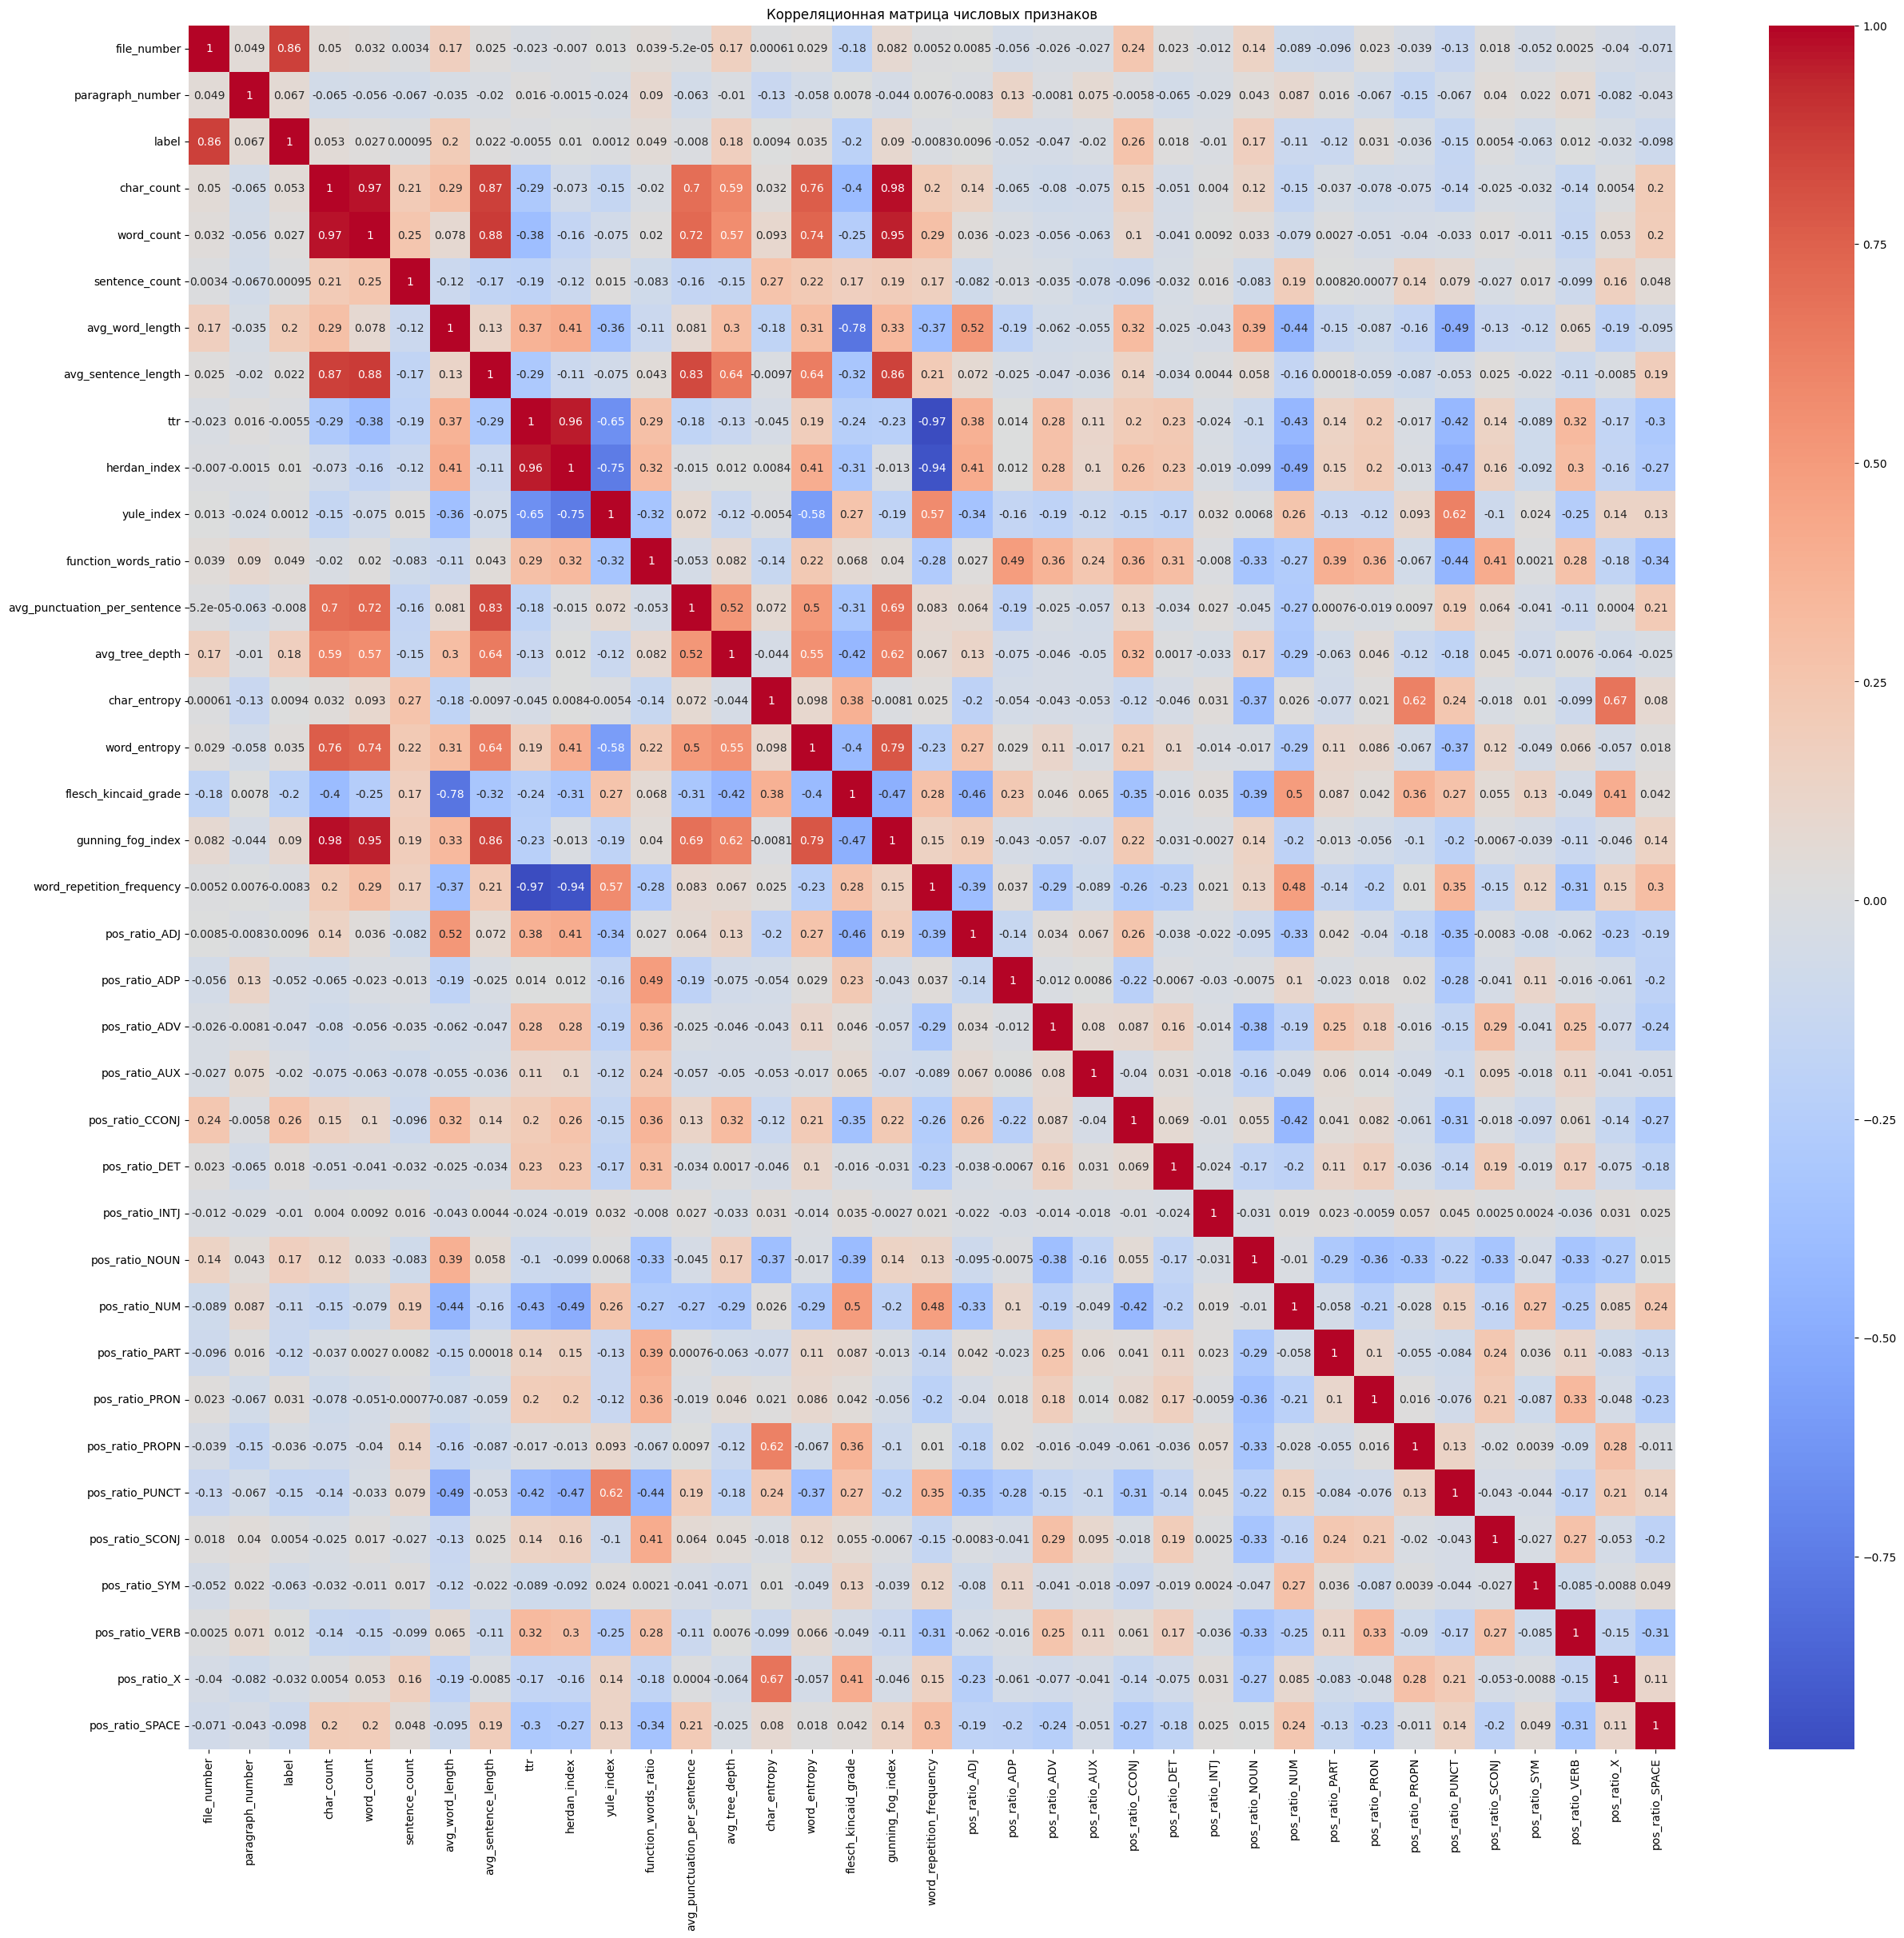

In [ ]:
# Корреляционная матрица новая
numeric_columns = df_result.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(30, 28))
sns.heatmap(df_result[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица числовых признаков')
plt.show()

In [ ]:
df_result.to_csv('result6_oll_data.csv', index=False)

#Выводы
Таблицу с признаками получила, проверила, чтобы все рассчитанные признаки лежали в подобающих им диапазонах значений, удалила пустые строки и столбцы.

Навряд ли получится хорошая модель по этим признакам. Очень слабая корреляция с целевой переменной. Но посмотрим.